## 1000 most common words

In [1]:
import string
import re

from nltk.corpus import machado, mac_morpho, floresta, genesis
from nltk.text import Text
import nltk
import pandas as pd
import translators as ts
import translators.server as tss


Using state Lisbon server backend.


In [2]:
# download Corpuses for Portuguese
nltk.download(['machado', 'genesis', 'mac_morpho'])
nltk.download('stopwords')

[nltk_data] Downloading package machado to
[nltk_data]     /Users/jkuypers/nltk_data...
[nltk_data]   Package machado is already up-to-date!
[nltk_data] Downloading package genesis to
[nltk_data]     /Users/jkuypers/nltk_data...
[nltk_data]   Package genesis is already up-to-date!
[nltk_data] Downloading package mac_morpho to
[nltk_data]     /Users/jkuypers/nltk_data...
[nltk_data]   Package mac_morpho is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jkuypers/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
machado_05 = Text(machado.words('romance/marm05.txt'), name="Memórias Póstumas de Brás Cubas (1881)")
machado_08 = Text(machado.words('romance/marm08.txt'), name="Dom Casmurro (1899)")
genesis_text = Text(genesis.words('portuguese.txt'), name="Gênesis")
mac_morpho_test = Text(mac_morpho.words('mu94se01.txt'), name="Folha de Sao Paulo (1994)")

In [4]:
# get stopwords for Portuguese
stop_words = nltk.corpus.stopwords.words('portuguese')

In [5]:
big_corpus = machado_05.tokens + machado_08.tokens + genesis_text.tokens + mac_morpho_test.tokens

# all lower case
# total = list(map(lambda x: x.lower(), total))

In [6]:
# get punctuation list to remove later
punctuation = list(string.punctuation)
punctuation.append('...')

In [7]:

def clean_corpus(corpus: list, stopwords: list, punctuation: list) -> list:
    cleaned_corpus = []
    for word in corpus:
        if (word not in stopwords) and (word not in punctuation) and (not bool(re.match(r'\w*[A-Z]\w*', word))):
            cleaned_corpus.append(word)
    return cleaned_corpus

In [8]:
# clean tokens - remove stopwords, remove punctuation, remove Named Entities with capital letter (Names, cities, etc.)

cleaned_corpus = clean_corpus(big_corpus, stop_words, punctuation)

/Users/jkuypers/.local/share/virtualenvs/most_common_words-KFU38Ard/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 151 (\x97) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


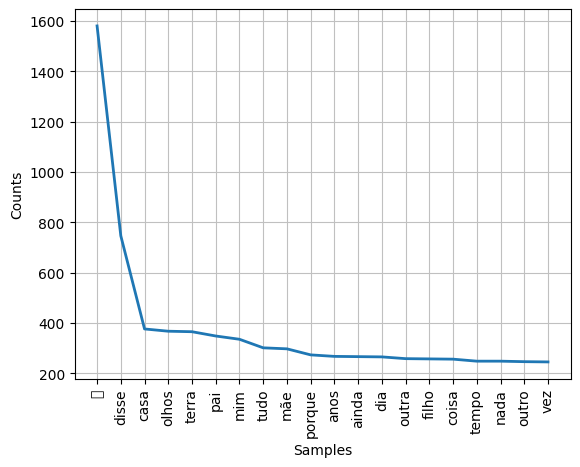

In [9]:
word_freq = nltk.FreqDist(cleaned_corpus)
word_freq.plot(20);

In [10]:
df = pd.DataFrame(word_freq.items(), columns=['word', 'frequency'])
df = df.sort_values(by='frequency', ascending=False).reset_index(drop=True)

In [11]:
df.head()

,word,frequency
0,,1580
1,disse,746
2,casa,376
3,olhos,367
4,terra,365


In [12]:
frequent_words = df.iloc[:1000]
frequent_words.head()

,word,frequency
0,,1580
1,disse,746
2,casa,376
3,olhos,367
4,terra,365


In [13]:
# https://github.com/uliontse/translators#getting-started

In [ ]:
frequent_words['word_pt'] = frequent_words['word'].apply(lambda x: tss.google(x, from_language='en', to_language='pt'))

In [ ]:
frequent_words